__Задача 1__

Даны значения зарплат из выборки выпускников: 
```
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150
```
Без использования статистических функций вроде `mean`, `std`, `var`, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
import statistics
warnings.filterwarnings('ignore')

In [2]:
salary = pd.Series([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])

In [3]:
#среднее арифметическое
mean_salary = salary.sum() / salary.count()
mean_salary

65.3

In [4]:
salary_std = np.sqrt(((salary - mean_salary) ** 2).sum() / salary.count())
salary_std

30.823854398825596

In [5]:
#смещенная оценка дисперсий 
salary_var_0 = ((salary - mean_salary) ** 2).sum() / salary.count()
salary_var_0

950.11

In [6]:
#несмещенная оценка дисперсий 
salary_var_1 = ((salary - mean_salary)**2).sum() / (salary.count() - 1)
salary_var_1

1000.1157894736842

In [7]:
salary.mean()

65.3

In [8]:
salary.std(ddof=0)

30.823854398825596

In [9]:
salary.var(ddof=0)

950.11

In [10]:
salary.var(ddof=1)

1000.1157894736842

__Задача 2__

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из `boxplot`. В этой задаче можно использовать статистические функции.

In [11]:
#первый квартиль
quartile1 = salary.quantile(0.25)
quartile1

42.0

In [12]:
#третий квартиль
quartile3 = salary.quantile(0.75)
quartile3

81.0

In [13]:
#интерквартильное расстояние
iqr = quartile3 - quartile1
iqr

39.0

In [14]:
#"Усы" boxplot
boxplot_range = (quartile1  - 1.5 * iqr, quartile3  + 1.5 * iqr)
boxplot_range

(-16.5, 139.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x2c3b4216438>,
 'caps': [<matplotlib.lines.Line2D at 0x2c3b4216ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c3b4205fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c3b4216ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c3b42274e0>],
 'means': []}

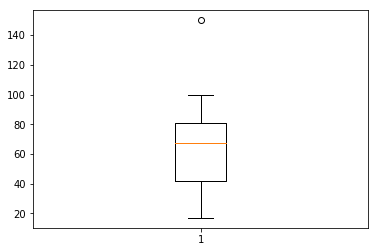

In [15]:
plt.boxplot(salary)

In [16]:
#выброс
outliers = salary[(salary < boxplot_range[0]) | (salary > boxplot_range[1])]
outliers.values

array([150], dtype=int64)

__Задача 3__

Для распределения Пуассона с параметром `a = 5` найти теоретические (т.е. используя закон распределения, а не выборку) мат. ожидание, моду и медиану.

__Задача 4__

В университет на факультеты `A` и `B` поступило равное количество студентов, а на факультет `C` студентов поступило столько же, сколько на `A` и `B` вместе. Вероятность того, что студент факультета `A` сдаст первую сессию, равна 0.8. Для студента факультета `B` эта вероятность равна 0.7, а для студента факультета `C` - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете `A`? б) на факультете `B`? в) на факультете `C`?

_Замечание_: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

In [17]:
#пусть на A учатся 50 студентов, на В 50 студентов, на С 100 студентов
a=50
b=50
c=100
#Вероятность, что студент учится на A
P_1 = a/(a+b+c)
P_1

0.25

In [18]:
#Вероятность, что студент учится на B
P_2 = b/(a+b+c)
P_2

0.25

In [19]:
#Вероятность, что студент учится на C
P_3 = c/(a+b+c)
P_3

0.5

In [20]:
#а) Вероятность, что студент сдал дана, общая вероятность сдачи
p_a=0.8
p_b = 0.7
p_c= 0.9
P = p_a*P_1 + p_b*P_2 + p_c*P_3
P

0.825

In [21]:
#по формуле Байеса
#а)сдавший студент с факультета А
P_a_ = p_a*P_1/P
P_a_

0.24242424242424246

In [22]:
#б)сдавший студент с факультета В
P_b_ = p_b*P_2/P
P_b_

0.21212121212121213

In [23]:
#в)сдавший студент с факультета С
P_c_ = p_c*P_3/P
P_c_

0.5454545454545455